In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from glob import glob
import pathlib
import common

FONT_SIZE = 15
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [48]:
trace = 'msr_proj_1.tr'

df = common.load_reports(common.log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
#     & ((df.cache_type != "LFO") | (df.sample_size == 1000000))
    & (df.n_warmup == 10000000)
#     & (100000000 <= df.cache_size)
#     & (df.cache_size <= 10000000000)
#     & (df.n_warmup == 100000)
#     & (df.if_uni_size == False)
#     & (df.cache_capacity <= 30000)
#     & (
#         (df.algorithm.isin(['SLRU', 'Belady', 'Random', 'LRU', 'BeladyLR'])) 
#         | (df.algorithm.isin(['FIFOLR', 'LRULR', 'GDSFLR', 'LFULR']))
#         | ((df.algorithm == 'LR') & (df.sample_rate == 32))
#         | ((df.algorithm == 'SLRULR') & (df.sample_rate == 32))
#     )
)
df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

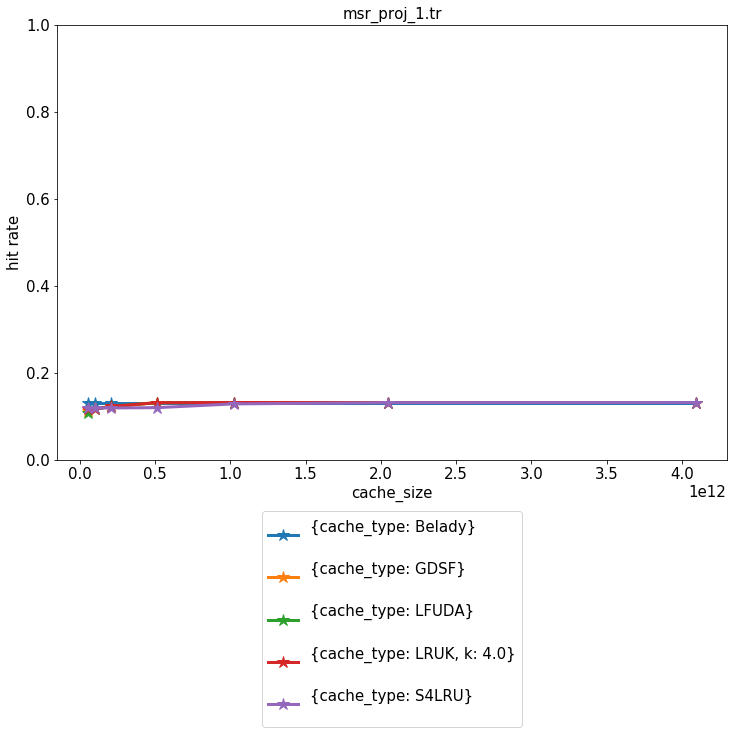

In [49]:
top = df1[['label', 'cache_size', 'byte_hit_rate']].groupby(['label']).agg({'byte_hit_rate': 'mean'}).sort_values(by='byte_hit_rate', ascending=False)[0:5].index.tolist()
df_show = df1[df1.label.isin(top)]

fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df_show.groupby(['label']):
    grp = grp.sort_values(by=['cache_size'])
    ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

In [50]:
df1[['byte_hit_rate', 'cache_size', 'cache_type']].pivot(index='cache_type', columns='cache_size', values='byte_hit_rate')

cache_size,51200000000,102400000000,204800000000,512000000000,1024000000000,2048000000000,4096000000000
cache_type,,,,,,,
Belady,0.131711,0.131711,0.131711,0.131711,0.131711,0.131711,0.131711
GDSF,0.112405,0.119056,0.121431,0.131256,0.131711,0.131711,0.131711
LFO,0.106946,0.107004,0.108360,0.110079,0.110079,0.110079,0.110079
LFUDA,0.107032,0.116156,0.122683,0.131354,0.131711,0.131711,0.131711
LR,0.095197,0.089192,0.114963,0.129342,0.131711,0.131711,0.131711
LRU,0.100167,0.100962,0.121247,0.131354,0.131711,0.131711,0.131711
LRUK,0.115741,0.116445,0.122660,0.131354,0.131711,0.131711,0.131711
Random,0.096952,0.103398,0.112269,0.128809,0.131711,0.131711,0.131711
S4LRU,0.118834,0.118865,0.119122,0.119871,0.128467,0.131361,0.131711


In [51]:
trace = 'msr_proj_2.tr'

df = load_reports(log_dir)
filter_idx = (
    (df.trace_file == trace) 
    & (df.uni_size == 0)
#     & ((df.cache_type != "LFO") | (df.sample_size == 1000000))
    & (df.n_warmup == 10000000)
#     & (100000000 <= df.cache_size)
#     & (df.cache_size <= 10000000000)
#     & (df.n_warmup == 100000)
#     & (df.if_uni_size == False)
#     & (df.cache_capacity <= 30000)
#     & (
#         (df.algorithm.isin(['SLRU', 'Belady', 'Random', 'LRU', 'BeladyLR'])) 
#         | (df.algorithm.isin(['FIFOLR', 'LRULR', 'GDSFLR', 'LFULR']))
#         | ((df.algorithm == 'LR') & (df.sample_rate == 32))
#         | ((df.algorithm == 'SLRULR') & (df.sample_rate == 32))
#     )
)
df1 = df[filter_idx].copy()
df1['label'] = df1.apply(lambda x: to_label(x), axis='columns')

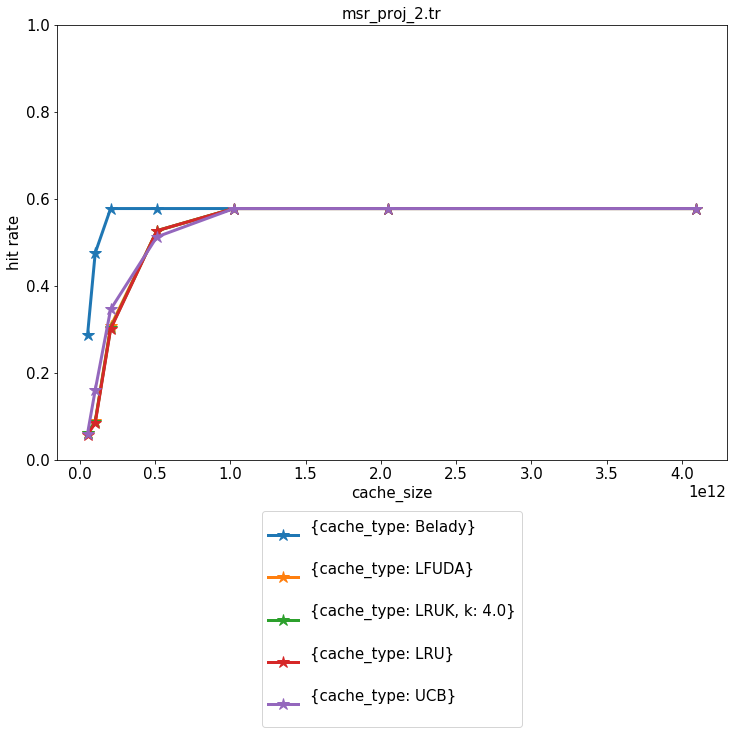

In [52]:
top = df1[['label', 'cache_size', 'byte_hit_rate']].groupby(['label']).agg({'byte_hit_rate': 'mean'}).sort_values(by='byte_hit_rate', ascending=False)[0:5].index.tolist()
df_show = df1[df1.label.isin(top)]

fig, ax = plt.subplots(figsize=(12, 8))
for k, grp in df_show.groupby(['label']):
    grp = grp.sort_values(by=['cache_size'])
    ax = grp.plot(ax=ax, kind='line', x='cache_size', y='byte_hit_rate', label=k, marker='*', markersize=12)
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
plt.ylabel('hit rate')
plt.title(trace)
plt.ylim([0, 1.])
plt.show()

In [53]:
df1[['byte_hit_rate', 'cache_size', 'cache_type']].pivot(index='cache_type', columns='cache_size', values='byte_hit_rate')

cache_size,51200000000,102400000000,204800000000,512000000000,1024000000000,2048000000000,4096000000000
cache_type,,,,,,,
Belady,0.286369,0.475554,0.577711,0.577711,0.577711,0.577711,0.577711
GDSF,0.058070,0.083675,0.153987,0.526754,0.577711,0.577711,0.577711
LFO,0.014591,0.036362,0.083049,0.088118,0.088118,0.088118,0.088118
LFUDA,0.061076,0.088211,0.306742,0.526725,0.577711,0.577711,0.577711
LR,0.056343,0.120717,0.221942,0.536019,0.577711,0.577711,0.577711
LRU,0.057133,0.084686,0.300774,0.526725,0.577711,0.577711,0.577711
LRUK,0.061565,0.087354,0.302239,0.526725,0.577711,0.577711,0.577711
Random,0.062683,0.120309,0.245217,0.481565,0.577711,0.577711,0.577711
S4LRU,0.069238,0.075399,0.096405,0.196437,0.420375,0.577063,0.577711
